In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data_path = "./Reviews.csv"
dataset = pd.read_csv(data_path,index_col = False)[:10000]

In [36]:
col = dataset.groupby([ 'UserId','ProfileName'])
sc = col.size().reset_index(name='Score count')
ave = col['Score'].mean().reset_index(name='Score mean')['Score mean']
sc["Score mean"] = ave

In [38]:
sc = sc.sort_values(by = ['Score count'], ascending=False)
sc.reset_index(drop=True, inplace=True)
sc.head(10)

,UserId,ProfileName,Score count,Score mean
0,A1Z54EM24Y40LL,c2,17,3.882353
1,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
2,A35R32TA60XD57,M. Torma,9,4.111111
3,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
4,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
5,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
7,AQQLWCMRNDFGI,Steven A. Peterson,6,4.166667
8,AY12DBB0U420B,Gary Peterson,6,4.500000
9,A2R6RA8FRBS608,Matthew G. Sherwin,6,5.000000


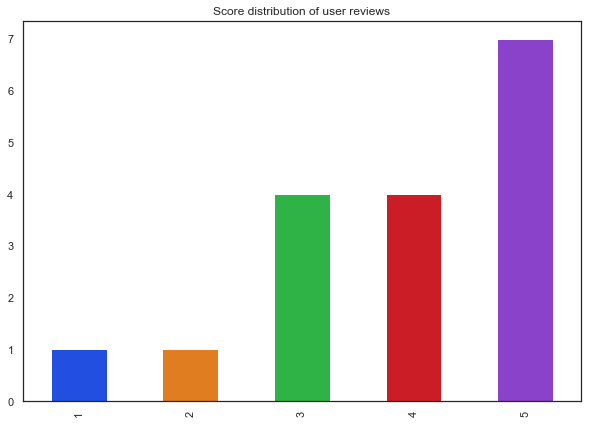

In [40]:
tg = sc["UserId"][0]
tg_data = dataset.loc[pd_data['UserId'] == tg]
tg_score = tg_data.groupby(['Score']).size().reset_index(name='Count')
 
sns.set(style="white")
sns.set_palette(sns.color_palette('bright'))

plt.figure(figsize=(10, 7))

plot = sns.barplot(x = 'Score', y = 'Count', data = target_score)

columncounts = [50,50,50,50,50]

def normaliseCounts(widths,maxwidth):
    widths = np.array(widths)/float(maxwidth)
    return widths

widthbars = normaliseCounts(columncounts,100)

for bar,newwidth in zip(plot.patches,widthbars):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.

    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)
    
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plot.set_title('Score distribution of user reviews')
plot.set_xlabel('')
plot.set_ylabel('')

plt.show()

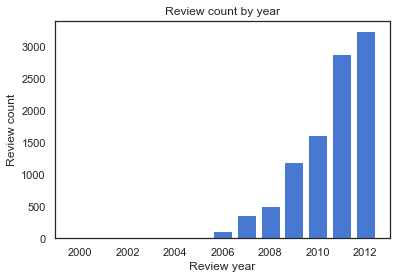

In [46]:
year_df = pd.DataFrame()
year_df["Year"] = pd.to_datetime(dataset["Time"], unit='s').dt.year

years = year_df.groupby('Year')
year_count = years.size().reset_index(name='Review Count')

sns.set_palette(sns.color_palette('muted'))

plt.bar(year_count['Year'],year_count['Review Count'])

plt.xlabel("Review year")
plt.ylabel("Review count")
plt.title("Review count by year")
plt.show()

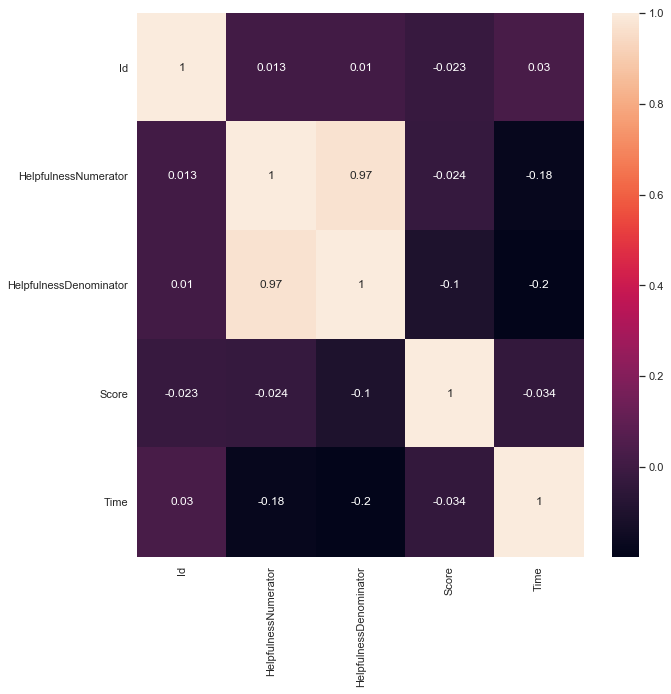

In [43]:
heat = pd_data[['Id','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time']]
plt.figure(figsize=(10, 10))
sns.heatmap(heat.corr(),annot=True)
plt.show()

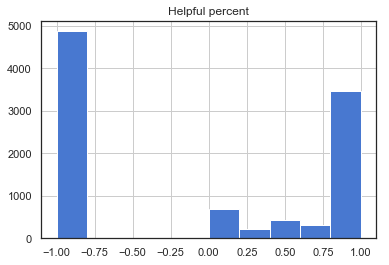

In [47]:
def percentage_calculator(row):
    if row['HelpfulnessNumerator'] <= row['HelpfulnessDenominator'] and row['HelpfulnessDenominator']!= 0:
        return row['HelpfulnessNumerator']/row['HelpfulnessDenominator']
    elif row['HelpfulnessNumerator'] == 0 and row['HelpfulnessDenominator'] == 0:
        return -1
    else:
        return 0

year_df['Helpful percent'] = dataset.apply(percentage_calculator, axis=1)

sns.set_palette(sns.color_palette('muted'))
hist = year_df.hist(column='Helpful percent')